<Center><h1>DAV 5400 Project 2 (M9) (100 Points)</h1></Center>
<Center><h1>Working with HTML, JSON, Web Scraping, and Web APIs</h1></Center>
<Center><h2>Team members: Ojopagogo Rachael, Abdulla Mamum, Bitterlein Konnoth Biju</h2><Center>

## Importing the neccessary libraries needed for the project

In [66]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

QUestion 1: (30 points): Working with HTML and JSON
Pick three albums/CD’s from three different musical artists. For each album/CD, include the album title, the name of the musical artist, a list of at least five of the songs/tracks that appear on the album/CD, and the year in which the album/CD was released. Take the information that you’ve selected about these three albums, and create two files using a text editor: one of which stores the albums’ information in HTML (using an html table) and the other of which stores the albums’ information in JSON format (e.g. “albums.html” and “albums.json”). Post the two files to your GitHub repository, and load them into your Jupyter Notebook from your online repository. Then, write Python code, using your packages of choice, to load the information from each of the two files you’ve created into separate PANDAS data frames. Are the two data frames identical?
Your deliverable for Part I of this Project is the two files you’ve created and your Python code. Post the two source files to your GitHub repository and package your Python code within a Jupyter notebook (along with your code for Parts II and III below).

We used a simple text editor Notepad to create HTML and JSON files. These files were then uploaded to our GitHub repository. Finally, we imported the files into Jupyter Notebook for further processing and analysis.

In [5]:
# Load the HTML file
html_file = pd.read_html('https://raw.githubusercontent.com/Rachael2311/DAV-5400/main/album.html')[0]
print(html_file)

         Album     Artist  Year  \
0     Timeless     Davido  2023   
1  I told them  Burna Boy  2023   
2    Take care      Drake  2011   

                                               Track  
0  Bop, Picasso, In the garden, E pain me, God fa...  
1  12 Jewel, I told them, Thanks, Cheat on me, Gi...  
2  Crew love, The motto, Lord knows, Take care, M...  


To extract data from the HTML file

In [9]:
html_file.head()

,Album,Artist,Year,Track
0,Timeless,Davido,2023,"Bop, Picasso, In the garden, E pain me, God fa..."
1,I told them,Burna Boy,2023,"12 Jewel, I told them, Thanks, Cheat on me, Gi..."
2,Take care,Drake,2011,"Crew love, The motto, Lord knows, Take care, M..."


In [11]:
# view the artist name of album
html_file.Artist

0       Davido
1    Burna Boy
2        Drake
Name: Artist, dtype: object

In [13]:
# view the tracks in the album
html_file.Track

0    Bop, Picasso, In the garden, E pain me, God fa...
1    12 Jewel, I told them, Thanks, Cheat on me, Gi...
2    Crew love, The motto, Lord knows, Take care, M...
Name: Track, dtype: object

Import the JSON file into Jupyter Notebook

In [ ]:
# Load the JSON file
json_file = pd.read_json('https://raw.githubusercontent.com/Rachael2311/DAV-5400/main/album.json')
print(json_file)

In [14]:
json_file.head()

,Album,Artist,Year,Track
0,Timeless,Davido,2023,"[Bop, Picasso, In the garden, E pain me, God f..."
1,I told them,Burna boy,2023,"[12 Jewel, I told them, Thanks, Cheat on me, G..."
2,Take Care,Drake,2011,"[Crew love, The motto, Lord knows, Take care, ..."


We determine whether the two data frames have the same structure by using the equal() function

In [17]:
# Check if the two DataFrames are identical
identical = html_file.equals(json_file)
print("Are the two DataFrames identical?", identical)

Are the two DataFrames identical? False


## Part II: (40 points): Scraping the Katz School’s “Staff” Web Page
For Part II of Project 2 you will be using your web scraping skills to extract data from a Katz School web page. Specifically, you will be extracting specific content from the Katz School’s “Staff” information page.

To complete this web scraping part have to follow some steps..
- Collected the data from the [website](https://www.yu.edu/katz/staff)
- Used beautiful soup library to parse the web data to make dataframe about katz staff which containing columns like name, title, phone, email and ofiice of staffs.

Import the website into Jupyter Notebook.

The below code block defines a web page URL and fetches data from that URL using the `requests` library.


In [19]:
# Web page url for katz staff
url = "https://www.yu.edu/katz/staff"
# Fetching the url by request.get method to load the data in a varibale name response. 
response = requests.get(url)

In [20]:
# Check if the request was successful (status code 200)
response.status_code

200

The line of code below is using the BeautifulSoup library to parse the HTML content of a web page. The BeautifulSoup class takes two arguments: the HTML content to be parsed, and the name of the parser to use. In this case, the HTML content is being passed in as the response.content object.

In [21]:
# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(response.content,'html.parser')

In [77]:
# Find the div with class "text-only"
staff_info = soup.find_all('div',class_='text-only')
staff_info

[<div class="text-only">
 <div class="field field--name-field-paragraph-body"><h3>Office of the Dean </h3>
 <p>Paul Russo, Vice Provost and Dean <br/>
 Professor of Data Science<br/><a href="/faculty/pages/russo-paul">Read Dr. Russo's Biography</a> </p>
 <p>Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean <br/><a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
  <br/>
 Sofia Binioris, Director of Communications and Strategic Initiatives<br/><a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a> | 645-592-4719</p>
 <p>Jackie Hamilton, Executive Director of Enrollment Management and Partnerships<br/><a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>
 <p>Pamela Rodman, Director of Finance and Administration<br/><a href="mailto:pamela.rodman@yu.edu">pamela.rodman@yu.edu</a> I 646.592.4777</p>
 <p>Tabitha Collazo, Business and Operations Coordinator<br/><a href="mailto:tabitha.collazo@yu.edu">t

We extract relevant staff information, including names, titles, email addresses, phone numbers, and office locations.



In [24]:
# Extract all paragrapgh from text into staff_arr variable
staff_arr = staff[0].find_all('p')
staff_arr

[<p>Paul Russo, Vice Provost and Dean <br/>
 Professor of Data Science<br/><a href="/faculty/pages/russo-paul">Read Dr. Russo's Biography</a> </p>,
 <p>Aaron Ross, Assistant Dean for Academic Programs and Deputy to the Dean <br/><a href="mailto:Aaron.Ross2@yu.edu">aaron.ross2@yu.edu</a> | 646-592-4148  <br/>
  <br/>
 Sofia Binioris, Director of Communications and Strategic Initiatives<br/><a href="mailto:Sofia.Binioris@yu.edu">sofia.binioris@yu.edu</a> | 645-592-4719</p>,
 <p>Jackie Hamilton, Executive Director of Enrollment Management and Partnerships<br/><a href="mailto:jackie.hamilton@yu.edu">jackie.hamilton@yu.edu</a> I 646-787-6194</p>,
 <p>Pamela Rodman, Director of Finance and Administration<br/><a href="mailto:pamela.rodman@yu.edu">pamela.rodman@yu.edu</a> I 646.592.4777</p>,
 <p>Tabitha Collazo, Business and Operations Coordinator<br/><a href="mailto:tabitha.collazo@yu.edu">tabitha.collazo@yu.edu</a> | 646-592-4735</p>,
 <p>Ann Leary, <span style='font-size:12.0pt;
 mso-fareas

### Getting the name of staff:
To extract staff name, we will create an empty list and iterate through the staff data using a for loop. Within the loop, we will employ a regular expression and a lambda function to identify and extract valid names from the data. The extracted names will be appended to the empty list, resulting in a clean list of staff names.

In [25]:
# create an empty list 
names = []
# Using for loop and regex get the names of staff
for name in staff_info[0].find_all('p'):
  name = name.get_text()
  name = name.split('\xa0\n\xa0\n')
  if len(name) == 1:
    name = name[0].split(',')
    names.append(name[0])
  else:
    for n in name:
      n = n.split(',')
      names.append(n[0])

names = list(filter(lambda x: len(x) > 0 and x != '\xa0',names))

In [62]:
# see the name of staffs at katz
print("The name of staffs :", names)
# View the number of staffs at katz
print("The total number of staffs are :", len(names))

The name of staffs : ['Paul Russo', 'Aaron Ross', 'Sofia Binioris', 'Jackie Hamilton', 'Pamela Rodman', 'Tabitha Collazo', 'Ann Leary', 'Jared Hakimi', 'Xavier Velasquez', 'Shayna Matzner', 'Linyu Zheng', 'Hyokyeong "Kyeong" Yu', 'Rafael Reyes', 'John Vivolo', 'Nebahat Bayrakcioglu', 'Gladys Davis', 'Ariana Allias', 'Lloyd Carew-Reid', 'Denton Field']
The total number of staffs are : 19


Extract the email addresses:
To extract email addresses from the data,create an empty list, iterate through the data using a for loop, and apply a regular expression to extract and clean the addresses.

In [27]:
# Creating an empty list emails
emails = []

for email in staff[0].find_all('p'):

  for a in email.find_all('a'):
    emails.append(a.text)

emails = list(filter(lambda x: 'Schedule an Appointment' not in x,emails))
email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

emails = list(map(lambda x: x if re.match(email_pattern,x) else 'NA',emails))

In [30]:
# see the email of staffs at katz
print("The email of staffs :", emails)

#print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

# View the number of emails at katz
print("The total number of emails are including NA(who has no email):", len(emails))

The email of staffs : ['NA', 'aaron.ross2@yu.edu', 'sofia.binioris@yu.edu', 'jackie.hamilton@yu.edu', 'pamela.rodman@yu.edu', 'tabitha.collazo@yu.edu', 'ann.leary@yu.edu', 'jared.hakimi@yu.edu', 'xavier.velasquez@yu.edu', 'shayna.matzner@yu.edu', 'linyu.zheng@yu.edu', 'hyokyeong.yu@yu.edu', 'rafael.reyes@yu.edu', 'john.vivolo@yu.edu', 'nebahat.bayrakcioglu@yu.edu', 'gladys.davis@yu.edu', 'ariana.allias@yu.edu', 'lloyd.carew-reid@yu.edu', 'denton.field@yu.edu']
The total number of emails are including NA(who has no email): 19


## Getting the title of staff
To extract staff titles from the data, create an empty list, iterate through the data using a for loop, and apply a regular expression to extract and clean the titles.

In [39]:
# Create an empty list as titles
titles = []

i = 0
for title in staff[0].find_all('p'):
  title =  title.get_text()
  title = title.split('\xa0\n\xa0\n')
  if title == ['\xa0']:
    continue
  if len(title) == 1:
    titles.append(title[0].split(',')[1].split(emails[i])[0])
    i += 1
  else:
    for t in title:
      titles.append(t.split(',')[1].split(emails[i])[0])
      i += 1

__Show the titles and number of titles in the dataset__

In [41]:
# See the title of staffs at katz
print("The title of staffs :", titles)

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

# View the number of titles at katz
print("The total number of titles are :", len(titles))

The title of staffs : [" Vice Provost and Dean\xa0\nProfessor of Data ScienceRead Dr. Russo's Biography\xa0", ' Assistant Dean for Academic Programs and Deputy to the Dean\xa0', ' Director of Communications and Strategic Initiatives', ' Executive Director of Enrollment Management and Partnerships', ' Director of Finance and Administration', ' Business and Operations Coordinator', "\xa0Office Manager/Executive Assistant to the Dean's Office", ' Director', ' Associate Director of Graduate Admissions Operations', ' Assistant Director', '\xa0Assistant Director', ' International Student Advisor', ' Director of Graduate Student Life and Community Engagement', ' Executive Director of Academic Operations and Teaching and Learning', ' Academic Program Coordinator', ' Academic Program Coordinator', ' Program Manager', '\xa0Instructional Designer', ' Media Production Manager']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The total number of titles are : 19


## Find the offices from the heading elements under h3
h3_elements = staff[0].find_all('h3')
h3_elements

In [33]:
# Extract and store the text in the offices variable as list
offices = [h3.get_text().strip() for h3 in h3_elements]
offices

['Office of the Dean',
 'Graduate Admissions',
 'Graduate Student Life',
 'Academic Operations and Teaching and Learning']

## Getting the phone number of staff
To extract staff phone numbers from the data, create an empty list, iterate through the data using a for loop, and apply a regular expression to extract and clean the numbers.

In [43]:
# Create an empty list an phone nums
phone_nums = []

i = 0
for phones in staff[0].find_all('p'):
  phones =  phones.get_text()
  phones = phones.split('\xa0\n\xa0\n')
  phone_pattern = r'(\+\d{1,3}\s?)?(\d{3}[-\s]?\d{3}[-\s]?\d{4})'

  if phones == ['\xa0']:
    continue
  if len(phones) == 1:
    filter_phone = re.findall(phone_pattern,phones[0])
    if filter_phone:
      phone_nums.append(filter_phone[0][1])
    else:
      phone_nums.append("NA")
    # print(filter_phone)
    # break
    # titles.append(title[0].split(',')[1].split(emails[i])[0])
    i += 1
  else:
    for p in phones:
      filter_phone = re.findall(phone_pattern,p)
      if filter_phone:
        phone_nums.append(filter_phone[0][1])
      else:
        phone_nums.append("NA")
      # titles.append(t.split(',')[1].split(emails[i])[0])
      i += 1

In [78]:
# Find the phone numbers of staffs at katz
print("The phone number of staffs :", phone_nums)

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

# View the number of phones for staff use at katz
print("The total number of phones user are :", len(phone_nums))

The phone number of staffs : ['NA', '646-592-4148', '645-592-4719', '646-787-6194', 'NA', '646-592-4735', '646-592-4724', '646-592-4722', '646-592-4737', '646-592-4726', '332-271-5865', '646-592-4736', '646-592-4729', '646-592-4743', '646-592-4034', '646-592-4762', 'NA', '646-592-4768', 'NA']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
The total number of phones user are : 19


### Creating the dataframe

In [83]:
# Creating dataframe as staff
staff_info = pd.DataFrame({
    #"office": offices,
    "name": names,
    "title": titles,
    "email": emails,
    "phone": phone_nums
})

In [85]:
# Create a new column for the office
staff_info['office'] = ''

# Assign values to the 'office' column
staff_info.loc[:6, 'office'] = offices[0]
staff_info.loc[7:11, 'office'] = offices[1]
staff_info.loc[12, 'office'] = offices[2]
staff_info.loc[13:, 'office'] = offices[3]

In [86]:
staff_info

,name,title,email,phone,office
0,Paul Russo,Vice Provost and Dean \nProfessor of Data Sci...,NA,NA,Office of the Dean
1,Aaron Ross,Assistant Dean for Academic Programs and Depu...,aaron.ross2@yu.edu,646-592-4148,Office of the Dean
2,Sofia Binioris,Director of Communications and Strategic Init...,sofia.binioris@yu.edu,645-592-4719,Office of the Dean
3,Jackie Hamilton,Executive Director of Enrollment Management a...,jackie.hamilton@yu.edu,646-787-6194,Office of the Dean
4,Pamela Rodman,Director of Finance and Administration,pamela.rodman@yu.edu,NA,Office of the Dean
5,Tabitha Collazo,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-4735,Office of the Dean
6,Ann Leary,Office Manager/Executive Assistant to the Dea...,ann.leary@yu.edu,646-592-4724,Office of the Dean
7,Jared Hakimi,Director,jared.hakimi@yu.edu,646-592-4722,Graduate Admissions
8,Xavier Velasquez,Associate Director of Graduate Admissions Ope...,xavier.velasquez@yu.edu,646-592-4737,Graduate Admissions
9,Shayna Matzner,Assistant Director,shayna.matzner@yu.edu,646-592-4726,Graduate Admissions


### Part 3: Working with Web API’s

To work with the newsdata.io API and convert the JSON data into a Pandas DataFrame for analysis, we need to follow these steps:
- Sign up for an API key on the news data.io website.

- Choose the API to work with "Live Breaking News".

- Use the API to retrieve JSON data.

- Parse the JSON data.

- Convert the data into a Pandas DataFrame.

- Perform some basic analysis on the data.

Import the API into jupyter notebook and defining the URL

In [51]:
api_key = 'pub_3243760fb6d22af18df2cd88f599ffca0ebfd'

In [52]:
# Define the API URL
topic = 'Live Breaking News'
api_url = f'https://newsdata.io/api/1/news?apikey={api_key}&q={topic}'
api_url

'https://newsdata.io/api/1/news?apikey=pub_3243760fb6d22af18df2cd88f599ffca0ebfd&q=Live Breaking News'

In [53]:
# Make the API request with my set key
response = requests.get(api_url)
# if response code result is 200 then we will get data sucessfully
response.status_code

200

In [54]:
# Check the response status code
if response.status_code == 200:
    data = response.json()
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")
    data = []

## Step 4: Parse JSON Data and Create DataFrame
After parsing the JSON data, it is converted into a Pandas DataFrame.

In [55]:
# create an emmpty list as data
data = news = data['results']

In [56]:
# Assuming the JSON data is a list of dictionaries
df = pd.DataFrame(news)
df.head()

,article_id,title,link,keywords,creator,video_url,description,content,pubDate,image_url,source_id,source_priority,country,category,language
0,aaf4f0424496a850f9695bdb3dd7f5ae,Harry Styles confirmed to have shaved his head...,https://metro.co.uk/2023/11/12/harry-styles-co...,"[Entertainment, Showbiz, Harry Styles]",[Emily Bashforth],None,Fans are in shock.,"What’s that we can hear? Oh, just the sound of...",2023-11-12 19:07:18,None,metro,1797,[united kingdom],[entertainment],english
1,41cd2f78b845a89e687f6955a68f54eb,Olivia Attwood breaks her silence on rumours o...,https://www.dailymail.co.uk/tvshowbiz/article-...,None,None,None,Olivia Attwood has broken her silence on rumou...,Olivia Attwood breaks her silence on rumours o...,2023-11-12 18:57:34,https://i.dailymail.co.uk/1s/2023/11/12/18/777...,dailymailuk,135,[united kingdom],[entertainment],english
2,b2dcdd4ce61ea746cfeec7b19790248c,Premier League fans hail 'guaranteed entertain...,https://www.dailystar.co.uk/sport/football/pre...,[Sport],None,None,Premier League fans have joked that it's guara...,"The term ""Barclays"" has long-since risen above...",2023-11-12 18:34:03,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[sports],english
3,7e88dba2847f110d8285b743fb485044,Micah Richards and Daniel Sturridge burst into...,https://www.dailystar.co.uk/sport/football/mic...,[Football],None,None,Sky Sports duo Micah Richards and Daniel Sturr...,Sky Sports pair and have been called 'box offi...,2023-11-12 18:06:30,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[top],english
4,406113a9bf227dc346e6fa3de9febdcc,ITV Big Brother’s Trish issues an apology afte...,https://www.manchestereveningnews.co.uk/news/t...,[TV],"[newsdesk@men-news.co.uk (Amelia Ward, Liv Cla...",None,Trish was evicted alongside Chanelle on Friday...,ITV Big Brother’s Trish has issued an apology ...,2023-11-12 17:31:10,https://i2-prod.manchestereveningnews.co.uk/in...,manchestereveningnews,6158,[united kingdom],[top],english


## Step 5: Basic Data Analysis
We will perform some basic analysis on the data using Pandas.

Check the structure of the data using df.head() and df.info().

In [58]:
# See the first 5 row of the data structure
df.head()

,article_id,title,link,keywords,creator,video_url,description,content,pubDate,image_url,source_id,source_priority,country,category,language
0,aaf4f0424496a850f9695bdb3dd7f5ae,Harry Styles confirmed to have shaved his head...,https://metro.co.uk/2023/11/12/harry-styles-co...,"[Entertainment, Showbiz, Harry Styles]",[Emily Bashforth],None,Fans are in shock.,"What’s that we can hear? Oh, just the sound of...",2023-11-12 19:07:18,None,metro,1797,[united kingdom],[entertainment],english
1,41cd2f78b845a89e687f6955a68f54eb,Olivia Attwood breaks her silence on rumours o...,https://www.dailymail.co.uk/tvshowbiz/article-...,None,None,None,Olivia Attwood has broken her silence on rumou...,Olivia Attwood breaks her silence on rumours o...,2023-11-12 18:57:34,https://i.dailymail.co.uk/1s/2023/11/12/18/777...,dailymailuk,135,[united kingdom],[entertainment],english
2,b2dcdd4ce61ea746cfeec7b19790248c,Premier League fans hail 'guaranteed entertain...,https://www.dailystar.co.uk/sport/football/pre...,[Sport],None,None,Premier League fans have joked that it's guara...,"The term ""Barclays"" has long-since risen above...",2023-11-12 18:34:03,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[sports],english
3,7e88dba2847f110d8285b743fb485044,Micah Richards and Daniel Sturridge burst into...,https://www.dailystar.co.uk/sport/football/mic...,[Football],None,None,Sky Sports duo Micah Richards and Daniel Sturr...,Sky Sports pair and have been called 'box offi...,2023-11-12 18:06:30,https://i2-prod.dailystar.co.uk/incoming/artic...,dailystar,3076,[united kingdom],[top],english
4,406113a9bf227dc346e6fa3de9febdcc,ITV Big Brother’s Trish issues an apology afte...,https://www.manchestereveningnews.co.uk/news/t...,[TV],"[newsdesk@men-news.co.uk (Amelia Ward, Liv Cla...",None,Trish was evicted alongside Chanelle on Friday...,ITV Big Brother’s Trish has issued an apology ...,2023-11-12 17:31:10,https://i2-prod.manchestereveningnews.co.uk/in...,manchestereveningnews,6158,[united kingdom],[top],english


In [59]:
# Check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       10 non-null     object
 1   title            10 non-null     object
 2   link             10 non-null     object
 3   keywords         5 non-null      object
 4   creator          2 non-null      object
 5   video_url        0 non-null      object
 6   description      10 non-null     object
 7   content          10 non-null     object
 8   pubDate          10 non-null     object
 9   image_url        8 non-null      object
 10  source_id        10 non-null     object
 11  source_priority  10 non-null     int64 
 12  country          10 non-null     object
 13  category         10 non-null     object
 14  language         10 non-null     object
dtypes: int64(1), object(14)
memory usage: 1.3+ KB


An analysis of the DataFrame revealed 15 columns, 10 rows, and four columns with non-null values. Only one variable is of integer data type, while the remaining variables are of object type.

In [60]:
df.dtypes

article_id         object
title              object
link               object
keywords           object
creator            object
video_url          object
description        object
content            object
pubDate            object
image_url          object
source_id          object
source_priority     int64
country            object
category           object
language           object
dtype: object

In [64]:
# see the columns of the dataframe
df.columns

Index(['article_id', 'title', 'link', 'keywords', 'creator', 'video_url',
       'description', 'content', 'pubDate', 'image_url', 'source_id',
       'source_priority', 'country', 'category', 'language'],
      dtype='object')

Since some columns are not useful for our analysis, we will exclude them and create a new DataFrame with only the relevant variables.

In [71]:
# Select the columns in a list which we will use 
selected_columns = ['title', 'creator', 'pubDate', 'source_id',
       'source_priority', 'country', 'category', 'language']

# Create a new dataframe name cleaned dataframe with thos new varibales selected
cleaned_df = df[selected_columns]

# Show the first five rows of newly created dataframe
cleaned_df.head()

,title,creator,pubDate,source_id,source_priority,country,category,language
0,Harry Styles confirmed to have shaved his head...,[Emily Bashforth],2023-11-12 19:07:18,metro,1797,[united kingdom],[entertainment],english
1,Olivia Attwood breaks her silence on rumours o...,None,2023-11-12 18:57:34,dailymailuk,135,[united kingdom],[entertainment],english
2,Premier League fans hail 'guaranteed entertain...,None,2023-11-12 18:34:03,dailystar,3076,[united kingdom],[sports],english
3,Micah Richards and Daniel Sturridge burst into...,None,2023-11-12 18:06:30,dailystar,3076,[united kingdom],[top],english
4,ITV Big Brother’s Trish issues an apology afte...,"[newsdesk@men-news.co.uk (Amelia Ward, Liv Cla...",2023-11-12 17:31:10,manchestereveningnews,6158,[united kingdom],[top],english


In [69]:
# Use the filterwarnings function to ignore warnings
warnings.filterwarnings("ignore")

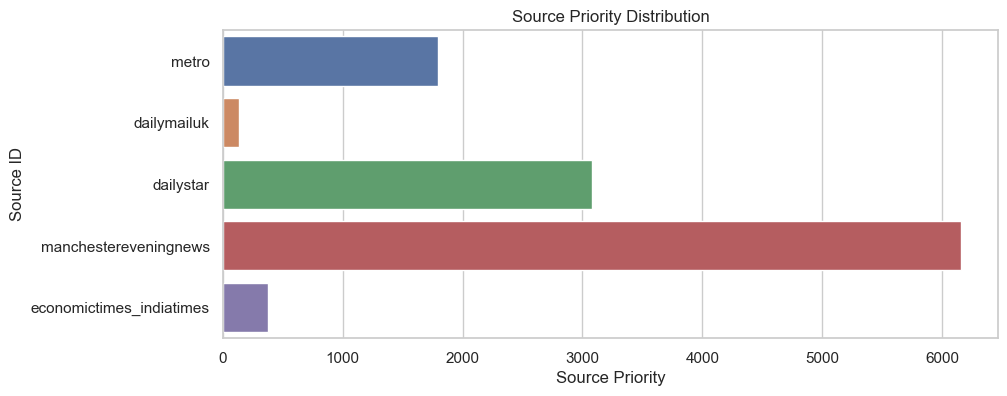

In [68]:
# Create a bar chart for source priority distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.barplot(x="source_priority", y="source_id", data=cleaned_df)
plt.title("Source Priority Distribution")
plt.xlabel("Source Priority")
plt.ylabel("Source ID")
plt.show();

Manchesterevening live is the highest number of source_priority. Its very high compare to others source_ID.

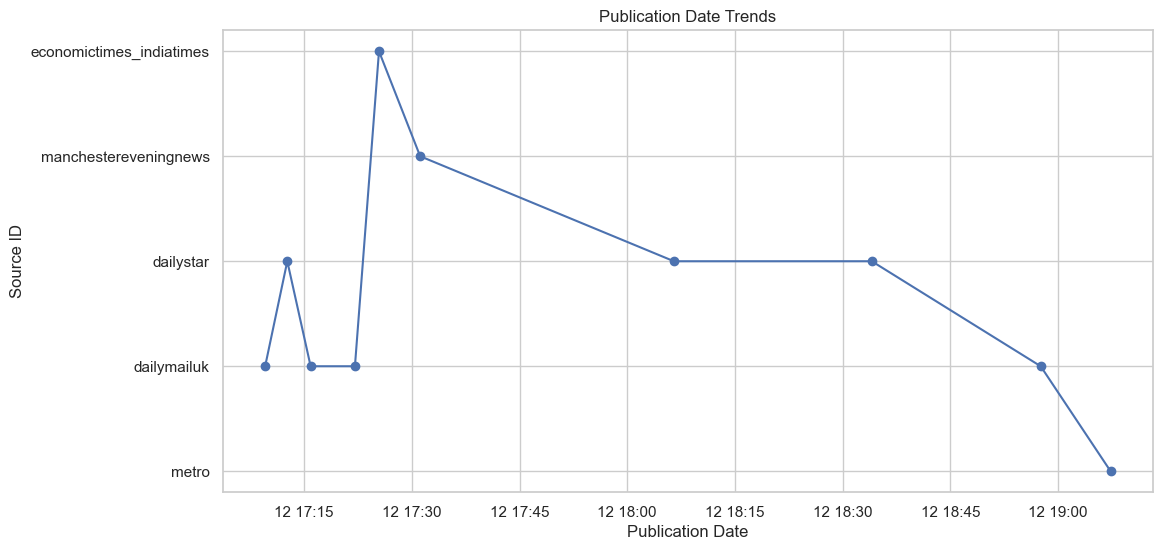

In [72]:
# Create a Time series line chart for publication date

# Convert the data type 
cleaned_df['pubDate'] = pd.to_datetime(cleaned_df['pubDate'])

plt.figure(figsize=(12, 6))
plt.plot(cleaned_df['pubDate'], cleaned_df['source_id'], marker='o')
plt.title("Publication Date Trends")
plt.xlabel("Publication Date")
plt.ylabel("Source ID")
plt.show();

In [73]:
# Convert lists to strings and remove square brackets
cleaned_df['country'] = cleaned_df['country'].astype(str).str.strip('[]')

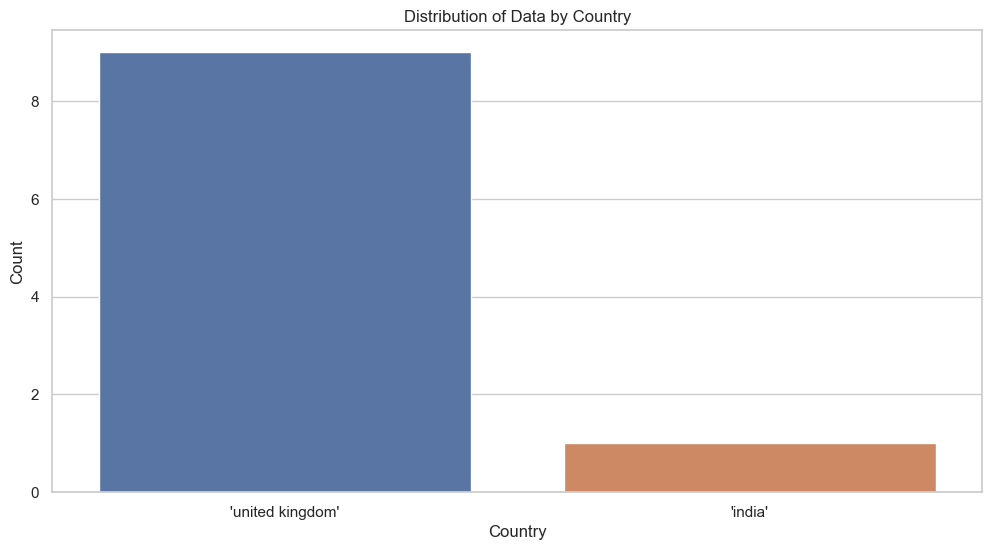

In [74]:
# Show a Countplot for countries distribution
plt.figure(figsize=(12, 6))
sns.countplot(x="country", data=cleaned_df)
plt.title("Distribution of Data by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show();

This shows United Kingdom has the highest news count more than other country like India

In [75]:
# Convert lists to strings and remove square brackets
cleaned_df['category'] = cleaned_df['category'].astype(str).str.strip('[]')

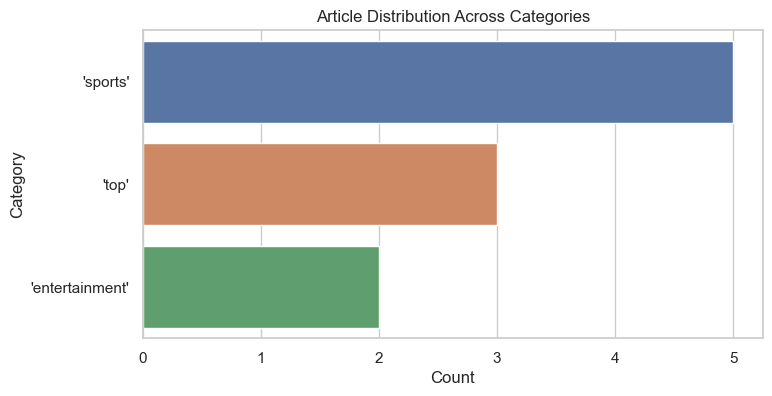

In [76]:
# Horizontal bar chart for categories
plt.figure(figsize=(8, 4))
sns.countplot(y="category", data=cleaned_df, order=cleaned_df['category'].value_counts().index)
plt.title("Article Distribution Across Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show();


Based on categories, Sports cover most of the news than entertainment.

## Summary:
Learning new skills in my career is challenging yet rewarding. The project provided an opportunity to explore text data analysis, web data extraction using API, and the Python libraries Beautiful Soup and Requests. The text extraction and regex-based data cleaning process presented significant challenges. However, through this task, I gained valuable experience and developed my skills under the guidance of my esteemed professor. The visualization of the news dataset in the web API section provided insights into the news spread across various categories, such as sports, entertainment, language, country, and category. This initial analysis yielded valuable visual insights.